In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [27]:
original_img = cv2.imread('pictures/content/in58.png')
stylized_img = cv2.imread('pictures/results/result58.png')
# Convert to grayscale
original_img = cv2.resize(original_img, (stylized_img.shape[1], stylized_img.shape[0]), interpolation=cv2.INTER_LINEAR)
original_gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
stylized_gray = cv2.cvtColor(stylized_img, cv2.COLOR_BGR2GRAY)

In [28]:
# Sobel edge detection
def sobel_edges(img):
    grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = cv2.magnitude(grad_x, grad_y)
    return magnitude

original_edges = sobel_edges(original_gray)
stylized_edges = sobel_edges(stylized_gray)
original_edges = cv2.normalize(original_edges, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
stylized_edges = cv2.normalize(stylized_edges, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)


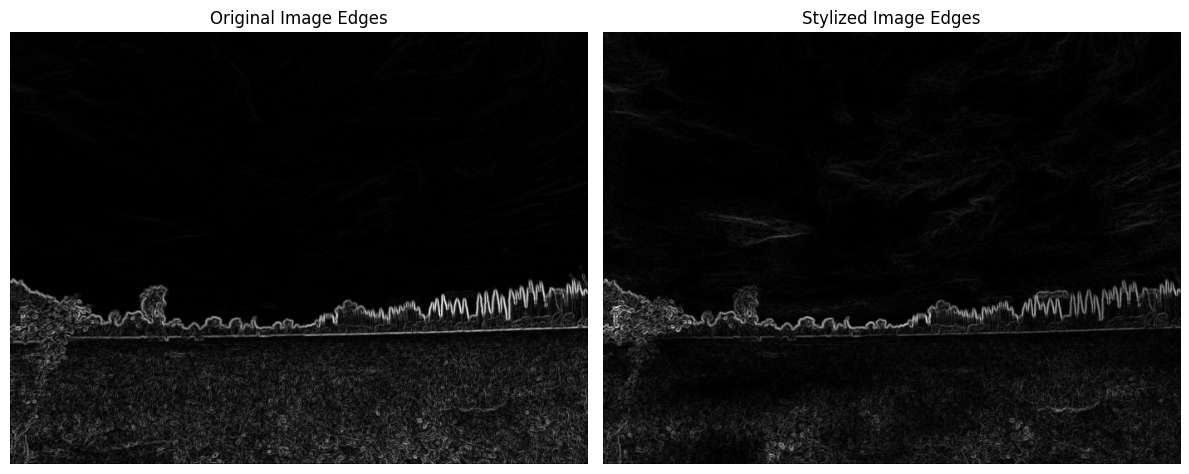

In [29]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image Edges')
plt.imshow(original_edges, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Stylized Image Edges')
plt.imshow(stylized_edges, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()

In [30]:
from skimage.metrics import structural_similarity as ssim
ssim_index, ssim_map = ssim(original_edges, stylized_edges, full=True, data_range=255)

print(f"SSIM between edge responses: {ssim_index:.4f}")


SSIM between edge responses: 0.6580
